### Data Url
https://alicia.data.socrata.com/Government/States-21basic/jhnu-yfrj/data <br>
https://www.kaggle.com/sogun3/uspollution/version/1

In [1]:
#Imports 
import numpy as np
import pandas as pd

import geopandas as gpd
import json
import datetime
from datetime import datetime


import folium
from folium.plugins import TimeSliderChoropleth

In [5]:
#Get polution data
polution = pd.read_csv("data/pollution_us_2000_2016.csv",index_col=0 )
print(len(polution))
print(polution.columns)

1746661
Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


In [23]:
polution1 = polution[['State','Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI','CO AQI']]
polution1 = polution1.iloc[[1,3517]]
polution1.head()

State  Date Local  NO2 AQI  O3 AQI  SO2 AQI  CO AQI
1        Arizona  2000-01-01       46      34     13.0    25.0
3517  California  2000-01-01       25      25      3.0     9.0

In [24]:
polution['State'].nunique()

47

In [25]:
polution['Date Local'].max()

'2016-05-31'

## Get Data 

In [26]:
#Get US states shapefile
states = gpd.read_file('data/states_21basic/geo_export_6fdb6415-82d2-400e-966c-a1d5a3d2ec8b.shp')
#states = states[['state_name','geometry']]
print(len(states))
states.head()

51


drawseq state_abbr state_fips    state_name          sub_region  \
0      NaN         HI         15        Hawaii             Pacific   
1      NaN         WA         53    Washington             Pacific   
2      NaN         MT         30       Montana            Mountain   
3      NaN         ME         23         Maine         New England   
4      NaN         ND         38  North Dakota  West North Central   

                                            geometry  
0  (POLYGON ((-160.0738033454681 22.0041773479577...  
1  (POLYGON ((-122.4020153103836 48.2252163723779...  
2  POLYGON ((-111.4754253002074 44.70216236909688...  
3  (POLYGON ((-69.77727626137293 44.0741483685119...  
4  POLYGON ((-98.73043728833767 45.93827137024809...

In [352]:
polution = pd.read_csv("data/pollution_us_2000_2016.csv")
print(len(polution))
print(polution.columns)
polution.head()

1746661
Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...  Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...  Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

In [150]:
list(polution['NO2 Units'])[0]

'Parts per billion'

In [161]:
for c in ['NO2 Units','O3 Units','SO2 Units','CO Units']:
    print("{}: {}".format(c,list(polution[c])[0]))

NO2 Units: Parts per billion
O3 Units: Parts per million
SO2 Units: Parts per billion
CO Units: Parts per million


# Test

[[46.0, 34.0, 13.0, 25.0],
 [34.0, 27.0, 4.0, 26.0],
 [48.0, 14.0, 16.0, 28.0],
 [72.0, 28.0, 23.0, 34.0],
 [58.0, 10.0, 21.0, 42.0],
 [71.0, 21.0, 24.0, 41.0],
 [41.0, 20.0, 30.0, 40.0],
 [39.0, 17.0, 26.0, 57.0],
 [35.0, 19.0, 19.0, 32.0],
 [68.0, 13.0, 30.0, 42.0],
 [80.0, 14.0, 34.0, 51.0],
 [80.0, 12.0, 37.0, 48.0],
 [104.0, 8.0, 30.0, 52.0],
 [105.0, 15.0, 41.0, 59.0],
 [86.0, 19.0, 31.0, 51.0],
 [71.0, 19.0, 19.0, 54.0],
 [101.0, 13.0, 27.0, 44.0],
 [101.0, 8.0, 33.0, 55.0],
 [86.0, 11.0, 31.0, 55.0],
 [63.0, 14.0, 24.0, 47.0],
 [58.0, 12.0, 24.0, 40.0],
 [62.0, 17.0, 20.0, 43.0],
 [64.0, 31.0, 20.0, 45.0],
 [76.0, 19.0, 26.0, 38.0],
 [56.0, 17.0, 16.0, 33.0],
 [40.0, 30.0, 10.0, 16.0],
 [48.0, 24.0, 16.0, 18.0],
 [51.0, 23.0, 20.0, 22.0],
 [64.0, 31.0, 24.0, 35.0],
 [54.0, 30.0, 14.0, 43.0],
 [50.0, 25.0, 13.0, 27.0],
 [52.0, 33.0, 21.0, 30.0],
 [62.0, 31.0, 29.0, 28.0],
 [69.0, 27.0, 26.0, 36.0],
 [91.0, 19.0, 40.0, 48.0],
 [65.0, 33.0, 23.0, 56.0],
 [62.0, 36.0, 17.0, 41.0],


# Transform Data - MEAN

In [240]:
polution_mean = polution[['State','Date Local', 'NO2 Mean', 'O3 Mean','SO2 Mean','CO Mean']]
print(len(polution_mean))
polution_mean.head()

1746661


State  Date Local   NO2 Mean   O3 Mean  SO2 Mean   CO Mean
0  Arizona  2000-01-01  19.041667  0.022500  3.000000  1.145833
1  Arizona  2000-01-01  19.041667  0.022500  3.000000  0.878947
2  Arizona  2000-01-01  19.041667  0.022500  2.975000  1.145833
3  Arizona  2000-01-01  19.041667  0.022500  2.975000  0.878947
4  Arizona  2000-01-02  22.958333  0.013375  1.958333  0.850000

In [242]:
#Make sure state names are the same
for s in list(polution_mean['State'].unique()):
    if s not in list(states['state_name']):
        print(s)

polution_mean = polution_mean[polution_mean['State'] != 'Country Of Mexico']
polution_mean['State'] = ['District of Columbia' if x == 'District Of Columbia' else x for x in polution_mean['State']]


In [243]:
polution_mean.head()

State  Date Local   NO2 Mean   O3 Mean  SO2 Mean   CO Mean
0  Arizona  2000-01-01  19.041667  0.022500  3.000000  1.145833
1  Arizona  2000-01-01  19.041667  0.022500  3.000000  0.878947
2  Arizona  2000-01-01  19.041667  0.022500  2.975000  1.145833
3  Arizona  2000-01-01  19.041667  0.022500  2.975000  0.878947
4  Arizona  2000-01-02  22.958333  0.013375  1.958333  0.850000

In [244]:
#Get year and month
polution_mean['Year'] = [x.split('-')[0] for x in polution_mean['Date Local']]
polution_mean['Month'] = [x.split('-')[1] for x in polution_mean['Date Local']]
polution_mean.drop(columns=['Date Local'],inplace=True)
polution_mean.head()

State   NO2 Mean   O3 Mean  SO2 Mean   CO Mean  Year Month
0  Arizona  19.041667  0.022500  3.000000  1.145833  2000    01
1  Arizona  19.041667  0.022500  3.000000  0.878947  2000    01
2  Arizona  19.041667  0.022500  2.975000  1.145833  2000    01
3  Arizona  19.041667  0.022500  2.975000  0.878947  2000    01
4  Arizona  22.958333  0.013375  1.958333  0.850000  2000    01

In [278]:
#Average by State, Year and Month
polution_mean = polution_mean.groupby(['State','Year','Month'],as_index=False).mean()
polution_mean.sort_values(['Year',"Month"],inplace=True)
polution_mean.head()

State  Year Month   NO2 Mean   O3 Mean   SO2 Mean  \
47                 Arizona  2000    01  50.773189  0.016449   4.298810   
353             California  2000    01  22.681607  0.013111   1.785449   
549               Colorado  2000    01   9.028766  0.010832   2.738187   
899   District of Columbia  2000    01  22.041963  0.011745  11.549862   
1093               Florida  2000    01  15.726173  0.017887   0.903710   

       CO Mean  
47    1.336585  
353   1.027905  
549   0.857931  
899   1.037432  
1093  0.788585

In [279]:
#Get Epoch Values for time 
polution_mean['Time'] = [datetime(int(Y),int(M),1,0,0).strftime('%s') for Y, M in zip(polution_mean['Year'],polution_mean['Month'])]
polution_mean.head()

State  Year Month   NO2 Mean   O3 Mean   SO2 Mean  \
47                 Arizona  2000    01  50.773189  0.016449   4.298810   
353             California  2000    01  22.681607  0.013111   1.785449   
549               Colorado  2000    01   9.028766  0.010832   2.738187   
899   District of Columbia  2000    01  22.041963  0.011745  11.549862   
1093               Florida  2000    01  15.726173  0.017887   0.903710   

       CO Mean       Time  
47    1.336585  946684800  
353   1.027905  946684800  
549   0.857931  946684800  
899   1.037432  946684800  
1093  0.788585  946684800

In [280]:
polution_mean.columns

Index(['State', 'Year', 'Month', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean',
       'Time'],
      dtype='object')

In [302]:
# Calculate oposity values 
opacity = polution_mean[['State','Time']]

for c in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']:
    max_ = max(polution_mean[c])
    opacity[c.split(" ")[0]] = [x/max_ for x in polution_mean[c]]

opacity['Time'] = ['0{}'.format(x) if len(x)==9 else x for x in opacity['Time'] ]

opacity.head()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


State        Time       NO2        O3       SO2        CO
47                 Arizona  0946684800  1.000000  0.276394  0.232876  0.583678
353             California  0946684800  0.446724  0.220309  0.096722  0.448879
549               Colorado  0946684800  0.177825  0.182006  0.148333  0.374653
899   District of Columbia  0946684800  0.434126  0.197353  0.625681  0.453039
1093               Florida  0946684800  0.309734  0.300546  0.048956  0.344370

In [303]:
# Get state ids 
ID = {}
for i,s in enumerate(states['state_name']):
    ID[s] = i

### Create Style Dictionary

styledict = {
    '0': {
        "2017": {'color': 'fffff0', 'opacity': 0.5},
        date: {'color': 'ffffff', 'opacity': 1}
        },
    '10': {date: {'color': '#d6bcdc', 'opacity': 0.8607179350594906},
  date: {'color': '#d9c3e0', 'opacity': 0.89735481548266},
  date: {'color': '#d8c1df', 'opacity': 0.9148058971446211}}
}

In [304]:
#Create initial style variable 
initial_style = {}
default = {'color': 'ffffff', 'opacity': 0.5}

unique_states = list(states['state_name'].unique())
unique_times = list(opacity['Time'].unique())

for s in unique_states:
    state_default = {}
    for t in unique_times:
        state_default[t] =  {'color': 'ffffff', 'opacity': 0.5}
    
    initial_style[ID[s]] = state_default

In [305]:
initial_style.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [339]:
def newStyle(gas,color):
    new_style = initial_style

    unique_states = list(opacity['State'].unique())
    for s in unique_states:
        state_ID = ID[s]
        state_opacity = opacity[opacity['State'] == s]

        for t,o in zip(state_opacity['Time'],state_opacity[gas]):
            style = {}
            style['color'] = color
            style['opacity'] = o +0.1
            new_style[state_ID][t] = style
    return new_style
    

## Plot data 

In [341]:
styledict = newStyle('NO2','#4262f4')
styledict = newStyle('O3','#f44141')
styledict = newStyle('SO2','#49f441')
styledict = newStyle('CO','#f4e541')

In [351]:
m = folium.Map(location=[50.77500, -100],zoom_start=3) #Initialize map

gas_layers = folium.FeatureGroup(name="Gases",overlay=True)

for gas, color in zip(['NO2', 'O3', 'SO2', 'CO'],['#4262f4','#f44141','#49f441','#f4e541']):
    
    
    feature = folium.FeatureGroup(name=gas,overlay=False)
    
    styledict = newStyle(gas,color)
    ts = TimeSliderChoropleth(states.to_json(), styledict)
    
    feature.add_child(ts)
    feature.add_to(gas_layers)
    
gas_layers.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

 #Add heatmap to map
m.save("test.html")
m

In [5]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3



In [ ]:
x = [1,2,3,4,5]
y = [13,2,4,5,2]

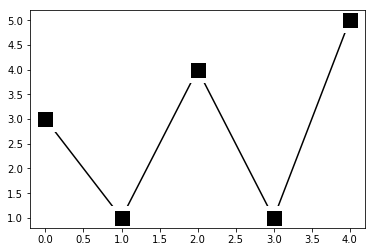

In [28]:
plt = folium.IFrame( figsize=(8, 4))

plt.

plt.plot([1,2,3,4,5],[1,2,3,4,5])

plt.title(state,size = 18)
plt.xlabel('Year',size =14)
plt.ylabel('Mean AQI',size =14)
plt.xticks(rotation=90)
plt.legend(loc =1)
    
    

AttributeError: 'IFrame' object has no attribute 'plot'

NameError: name 'cm' is not defined

In [29]:
import folium
from folium import FeatureGroup, LayerControl, Map, Marker

m = Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

feature_group = FeatureGroup(name='Some icons')
Marker(location=[45.3288, -121.6625],
       popup='Mt. Hood Meadows').add_to(feature_group)



popup = folium.Popup(html=iframe,max_width= 800)
Marker(location=[45.3311, -121.7113],
       popup=popup).add_to(feature_group)

feature_group.add_to(m)
LayerControl().add_to(m)

#m.save(os.path.join('results', 'FeatureGroup.html'))

m.save('htmltest.html')
m